# Reading the Dataset and Overview


In [43]:
!pip install scikit-learn
!pip install seaborn
!pip install xgboost
!pip install jinja2 --upgrade
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [44]:
yield_df = pd.read_csv("Dataset/yield_df.csv")

In [45]:
yield_df


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [46]:
yield_df.shape

(28242, 8)

In [47]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [48]:
yield_df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [49]:
yield_df.drop("Unnamed: 0",axis=1,inplace=True)
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [50]:
yield_df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


In [51]:
# remove countries with less than 100 record
country_counts =yield_df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
yield_df_filtered = yield_df[~yield_df['Area'].isin(countries_to_drop)]
yield_df = yield_df_filtered.reset_index(drop=True)

In [52]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [53]:
datacorr = yield_df.copy()

# Encoding the Categorical Variables


In [54]:
#Encoding of Categorical Columns
label_encoder = LabelEncoder()
datacorr['Area'] = label_encoder.fit_transform(datacorr['Area'])
Mapping= dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
Area_Mapping={}
Area_Mapping = Mapping.copy()

In [55]:
datacorr['Item'] = label_encoder.fit_transform(datacorr['Item'])
Mapping= dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
Item_Mapping={}
Item_Mapping = Mapping.copy()

In [56]:
Area_Mapping

{'Algeria': 0,
 'Angola': 1,
 'Argentina': 2,
 'Australia': 3,
 'Azerbaijan': 4,
 'Bangladesh': 5,
 'Brazil': 6,
 'Bulgaria': 7,
 'Burkina Faso': 8,
 'Burundi': 9,
 'Cameroon': 10,
 'Canada': 11,
 'Central African Republic': 12,
 'Chile': 13,
 'Colombia': 14,
 'Croatia': 15,
 'Dominican Republic': 16,
 'Ecuador': 17,
 'Egypt': 18,
 'El Salvador': 19,
 'France': 20,
 'Germany': 21,
 'Ghana': 22,
 'Greece': 23,
 'Guatemala': 24,
 'Guinea': 25,
 'Guyana': 26,
 'Haiti': 27,
 'Honduras': 28,
 'Hungary': 29,
 'India': 30,
 'Indonesia': 31,
 'Iraq': 32,
 'Italy': 33,
 'Jamaica': 34,
 'Japan': 35,
 'Kazakhstan': 36,
 'Kenya': 37,
 'Libya': 38,
 'Madagascar': 39,
 'Malawi': 40,
 'Mali': 41,
 'Mauritania': 42,
 'Mauritius': 43,
 'Mexico': 44,
 'Morocco': 45,
 'Mozambique': 46,
 'Nepal': 47,
 'Nicaragua': 48,
 'Niger': 49,
 'Pakistan': 50,
 'Papua New Guinea': 51,
 'Peru': 52,
 'Portugal': 53,
 'Romania': 54,
 'Rwanda': 55,
 'Saudi Arabia': 56,
 'Senegal': 57,
 'South Africa': 58,
 'Spain': 59,
 

In [57]:
Item_Mapping

{'Cassava': 0,
 'Maize': 1,
 'Plantains and others': 2,
 'Potatoes': 3,
 'Rice, paddy': 4,
 'Sorghum': 5,
 'Soybeans': 6,
 'Sweet potatoes': 7,
 'Wheat': 8,
 'Yams': 9}

In [58]:
datacorr

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,16500,89.0,1828.92,17.48
1,0,3,1990,78936,89.0,1828.92,17.48
2,0,4,1990,28000,89.0,1828.92,17.48
3,0,5,1990,16571,89.0,1828.92,17.48
4,0,8,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,70,4,2013,22581,657.0,2550.07,19.76
26293,70,5,2013,3066,657.0,2550.07,19.76
26294,70,6,2013,13142,657.0,2550.07,19.76
26295,70,7,2013,22222,657.0,2550.07,19.76


<AxesSubplot:>

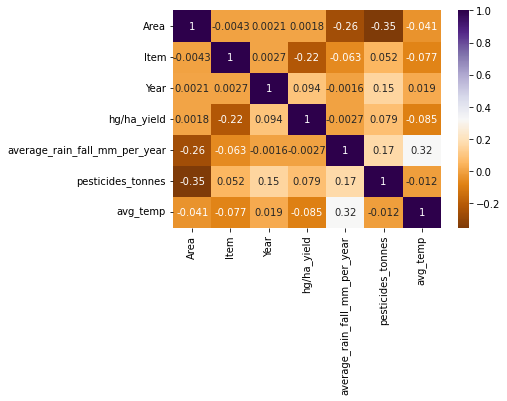

In [59]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

# Creating the test set and Scaling

In [60]:
X,y = datacorr.drop(labels='hg/ha_yield',axis=1),datacorr['hg/ha_yield']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)

In [63]:
X_test_sc = std_scaler.transform(X_test)

In [69]:
X_train

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
22272,54,6,2006,637.0,6733.20,11.63
2226,6,0,1992,1761.0,67003.89,27.42
1323,3,1,2007,534.0,32446.25,18.02
15879,35,6,2001,1668.0,78735.45,15.86
16706,37,9,1998,630.0,4114.00,16.53
...,...,...,...,...,...,...
21575,50,5,2012,494.0,990.09,27.23
5390,11,8,2004,537.0,36138.00,4.91
860,3,1,1995,534.0,25598.00,18.88
15795,35,6,1999,1668.0,79821.18,15.93


In [66]:
X_train_sc

array([[ 1.16700094,  0.60379857,  0.63825398, -0.7400389 , -0.5328344 ,
        -1.56627942],
       [-1.3516857 , -1.6882452 , -1.34717339,  0.83201791,  0.45994845,
         1.07263814],
       [-1.50910362, -1.3062379 ,  0.78007022, -0.88409749, -0.10928731,
        -0.49834508],
       ...,
       [-1.50910362, -1.3062379 , -0.92172467, -0.88409749, -0.22209215,
        -0.35461683],
       [ 0.17002081,  0.60379857, -0.3544597 ,  0.7019456 ,  0.67107571,
        -0.84763816],
       [ 1.42936413,  1.36781315, -0.63809219, -0.74143753, -0.08331498,
        -0.55851039]])

# Modelling

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


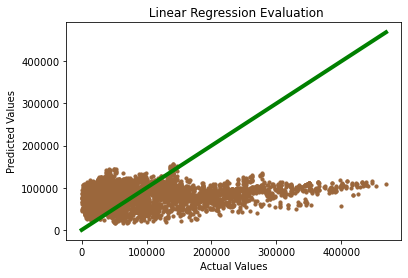

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.60


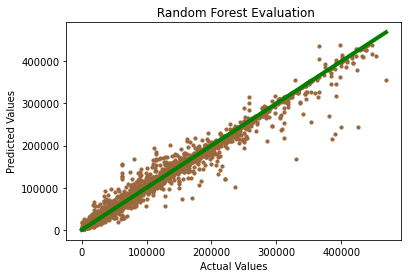

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.12


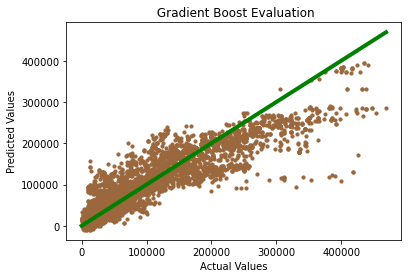

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the  XGBoost Model Test is 97.43


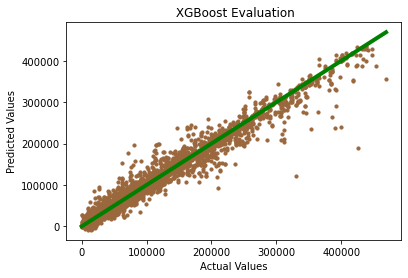

The accuracy of the KNN Model Train is 95.15
The accuracy of the  KNN Model Test is 90.27


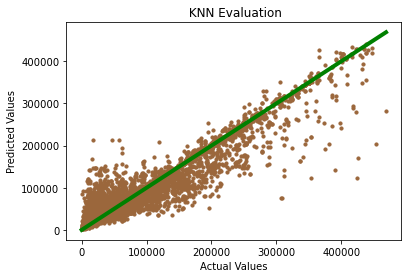

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.49


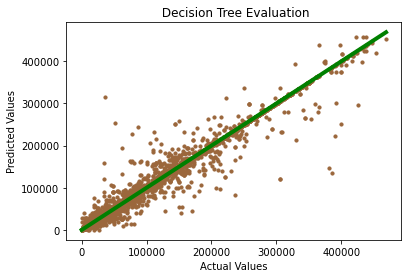

The accuracy of the Bagging Regressor Model Train is 99.80
The accuracy of the  Bagging Regressor Model Test is 98.61


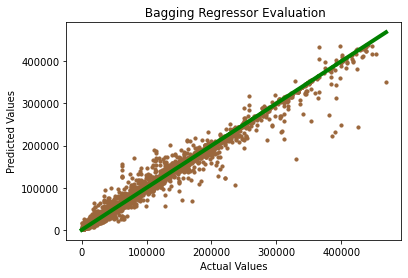

In [68]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=1812)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=1812)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=1812)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=1812))
          ]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()


#dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
#df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
#display(df_styled_best)


# Testing with Custom Inputs


In [70]:
test = []
test = [[30,4,2016,400,1000,28]]
df = pd.DataFrame(test, columns=['Area', 'Item', 'Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp'])
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,30,4,2016,400,1000,28


In [72]:
df_sc = std_scaler.transform(df)

In [75]:
model_test = RandomForestRegressor(random_state=1812)
model_test.fit(X_train_sc, y_train)
y_test = model_test.predict(df_sc)
y_test

array([33068.55])